# Gender Recognition by Voice | 03 | K Nearest Neighbors

## KNN Overview
this is how it works

## Import Libraries

In [1]:
import obj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
pd.set_option('display.max_columns', 30)  # set pandas to display all columns
sns.set_style('whitegrid')  # set plot backgrounds to white

# Set graphics to appear inline with notebook code
%matplotlib inline

Import scaled data from previous notebook.

In [3]:
data_scale = obj.load('var/data_scale')

## Split data into Training set and Testing set

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_scale.drop('label',axis=1), data_scale['label'],
                                                    test_size=0.33)

## Create KNN model and determine best parameters

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
error_rate = []
kvals = range(1,20)

for i in kvals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

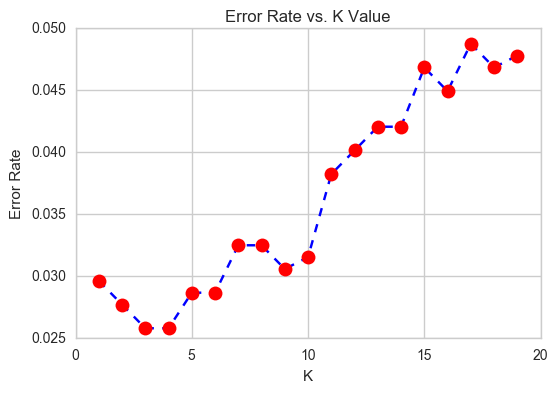

In [8]:
plt.plot(kvals, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Determine location of best performance

In [9]:
kloc = error_rate.index(min(error_rate))
print('Lowest error of %s occurs at k=%s.' % (error_rate[kloc], kvals[kloc]))

Lowest error of 0.0258126195029 occurs at k=3.


## Create model using best parameters and evaluate performance

In [10]:
knn = KNeighborsClassifier(n_neighbors=kvals[kloc])
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[493  23]
 [ 10 520]]


Classification Report:
             precision    recall  f1-score   support

     female       0.98      0.96      0.97       516
       male       0.96      0.98      0.97       530

avg / total       0.97      0.97      0.97      1046



## Try analysis with Uncorrelated Data

In [13]:
data_scaleNoCorr = obj.load('var/data_scaleNoCorr')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_scaleNoCorr.drop('label',axis=1), data_scaleNoCorr['label'],
                                                    test_size=0.33)

In [15]:
error_rate = []
kvals = range(1,20)

for i in kvals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

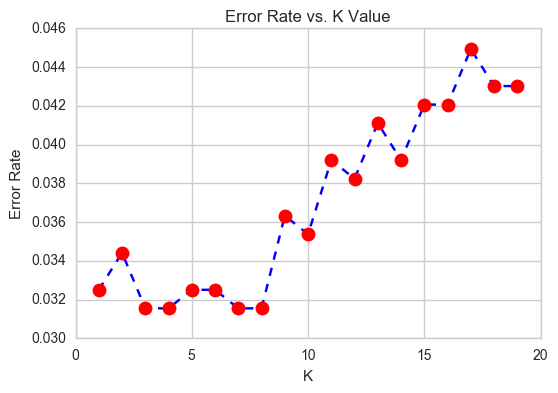

In [16]:
plt.plot(kvals, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [17]:
kloc = error_rate.index(min(error_rate))
print('Lowest error of %s occurs at k=%s.' % (error_rate[kloc], kvals[kloc]))

Lowest error of 0.0315487571702 occurs at k=3.


In [18]:
knn = KNeighborsClassifier(n_neighbors=kvals[kloc])
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [22]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[493  23]
 [ 10 520]]


Classification Report:
             precision    recall  f1-score   support

     female       0.98      0.96      0.97       516
       male       0.96      0.98      0.97       530

avg / total       0.97      0.97      0.97      1046

